In [1]:
import json
import os, sys
import csv
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns

# Write Dictionary with metaData
metaDataHeader = {}

metaDataHeader[0] = 'Data'
metaDataHeader[1] = 'Graph'
metaDataHeader[2] = 'full'
metaDataHeader[3] = 'multi'
metaDataHeader[4] = 'paired1'
metaDataHeader[5] = 'paired2'
metaDataHeader[6] = 'Number of maximum recursion depth'
metaDataHeader[7] = 'Number of maximum Transcripts/Gene'
metaDataHeader[8] = 'opt'
metaDataHeader[9] = 'Norm'
metaDataHeader[10] = 'Sparsity Constraint'
metaDataHeader[11] = 'Lambda'
metaDataHeader[12] = 'Mu'
metaDataHeader[13] = 'flowOptimization'
metaDataHeader[14] = 'CostFunctionIndex'
metaDataHeader[15] = 'maxAdditionalEdgeCount'
metaDataHeader[16] = 'Mode of Backtrack'
metaDataHeader[17] = 'Name of gtfFile'
metaDataHeader[18] = 'Name of csv-Resultfile'
metaDataHeader[19] = 'Name of jsonFile'
metaDataHeader[20] = 'Time'
metaDataHeader[21] = 'Number of Transcripts without Optimization'
metaDataHeader[22] = 'Number of Transcripts with Optimization'
metaDataHeader[23] = 'Number of genes with 0 Transcripts with Optimization'

metaDataHeader[24] = 'Average number of transcripts/gene without Optimization'
metaDataHeader[25] = 'Standard deviation of transcripts/gene without Optimization'
metaDataHeader[26] = 'Average number of transcripts/gene with Optimization'
metaDataHeader[27] = 'Standard deviation of transcripts/gene with Optimization'

metaDataHeader[28] = 'Average transcript size without Optimization'
metaDataHeader[29] = 'Standard deviation of transcriptSize without Optimization'
metaDataHeader[30] = 'Average transcript size with Optimization'
metaDataHeader[31] = 'Standard deviation of transcriptSize with Optimization'

metaDataHeader[32] = 'Average number of exons/Gene'
metaDataHeader[33] = 'Standard deviation of exons/Gene'

metaDataHeader[34] = 'Number of single Exon transcripts without Optimization'
metaDataHeader[35] = 'Number of single Exon transcripts with Optimization'

metaDataHeader[36] = 'Number of total Genes'
metaDataHeader[37] = 'Number of Genes exceeding maxTranscripts'
metaDataHeader[38] = 'Number of Genes exceeding maxRecursion'
metaDataHeader[39] = 'Number of Genes exceeding maxPairedBins'

metaDataHeader[40] = 'True positives'
metaDataHeader[41] = 'False positives'
metaDataHeader[42] = 'Total positives'
metaDataHeader[43] = 'False negatives'
metaDataHeader[44] = 'Total Transcripts of ReferenceGTF'
metaDataHeader[45] = 'Sensitivity on IntronChainLevel'
metaDataHeader[46] = 'Precision on IntronChainLevel'
metaDataHeader[47] = 'Fuzzy Sensitivity on IntronChainLevel'
metaDataHeader[48] = 'Fuzzy Precision on IntronChainLevel'

#Read DataFrame
fileName = ('../Results/resultsWP1.csv')
WP1_df = pd.read_csv(fileName, names=list(metaDataHeader.values()), header=None, delimiter='\t')
WP1_df['Time'] = WP1_df['Time'].str.split('s', expand=True)[0].astype(float)
WP1_df['Fraction exceeding Transcripts'] = WP1_df['Number of Genes exceeding maxTranscripts']/WP1_df['Number of total Genes']*100

# Split dataFrames by mode
WP1_df_full = WP1_df[WP1_df['full'] == 1]
WP1_df_multi = WP1_df[WP1_df['multi'] == 1]
WP1_df_paired1 = WP1_df[WP1_df['paired1'] == 1]
WP1_df_paired2 = WP1_df[WP1_df['paired2'] == 1]

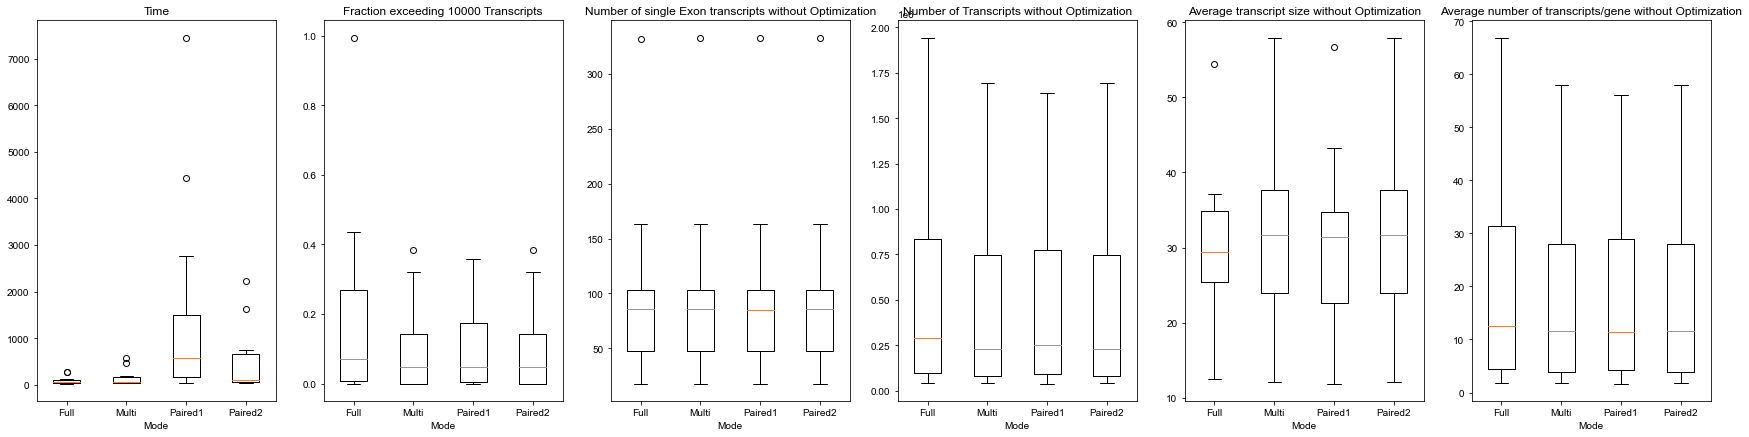

In [2]:
# Plot Results

# Create figure with 6 Figures
fig1, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6, figsize = (30, 7))
sns.set(style="darkgrid")

# Plot True Positives 
ax1.boxplot(x=[WP1_df_full['Time'], WP1_df_multi['Time'], WP1_df_paired1['Time'], WP1_df_paired2['Time']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax1.set_title('Time')
ax1.set_xlabel('Mode')

# Plot False Positives
ax2.boxplot(x=[WP1_df_full['Fraction exceeding Transcripts'], WP1_df_multi['Fraction exceeding Transcripts'], WP1_df_paired1['Fraction exceeding Transcripts'], WP1_df_paired2['Fraction exceeding Transcripts']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax2.set_title('Fraction exceeding 10000 Transcripts')
ax2.set_xlabel('Mode')

# Plot Total Positives
ax3.boxplot(x=[WP1_df_full['Number of single Exon transcripts without Optimization'], WP1_df_multi['Number of single Exon transcripts without Optimization'], WP1_df_paired1['Number of single Exon transcripts without Optimization'], WP1_df_paired2['Number of single Exon transcripts without Optimization']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax3.set_title('Number of single Exon transcripts without Optimization')
ax3.set_xlabel('Mode')

# Plot False Negatives
ax4.boxplot(x=[WP1_df_full['Number of Transcripts without Optimization'], WP1_df_multi['Number of Transcripts without Optimization'], WP1_df_paired1['Number of Transcripts without Optimization'], WP1_df_paired2['Number of Transcripts without Optimization']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax4.set_title('No. of Transcripts w/o Optimization')
ax4.set_xlabel('Mode')

# Plot Sensitivities
ax5.boxplot(x=[WP1_df_full['Average transcript size without Optimization'], WP1_df_multi['Average transcript size without Optimization'], WP1_df_paired1['Average transcript size without Optimization'], WP1_df_paired2['Average transcript size without Optimization']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax5.set_title('Average transcript size without Optimization')
ax5.set_xlabel('Mode')

# Plot Precision
ax6.boxplot(x=[WP1_df_full['Average number of transcripts/gene without Optimization'], WP1_df_multi['Average number of transcripts/gene without Optimization'], WP1_df_paired1['Average number of transcripts/gene without Optimization'], WP1_df_paired2['Average number of transcripts/gene without Optimization']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax6.set_title('Average number of transcripts/gene without Optimization')
ax6.set_xlabel('Mode')

plt.show()


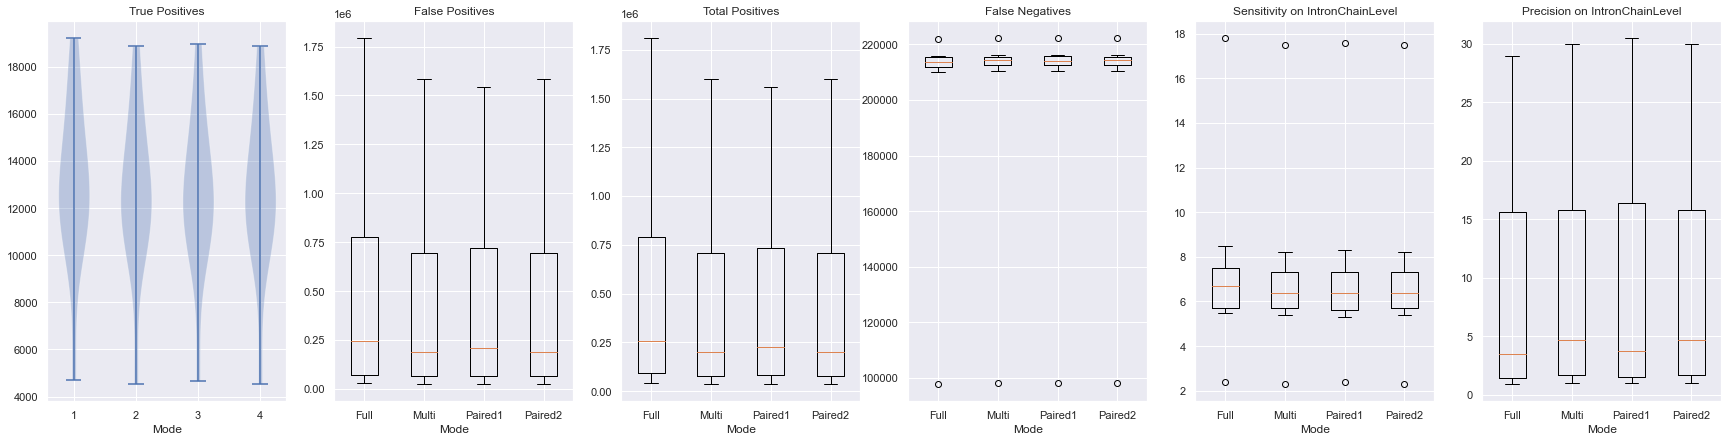

In [3]:
# Plot Results

# Create figure with 6 Figures
fig1, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6, figsize = (30, 7))
sns.set(style="darkgrid")

# Plot True Positives 
ax1.violinplot(dataset=[WP1_df_full['True positives'], WP1_df_multi['True positives'], WP1_df_paired1['True positives'], WP1_df_paired2['True positives']])
ax1.set_title('True Positives')
ax1.set_xlabel('Mode')

# Plot False Positives
ax2.boxplot(x=[WP1_df_full['False positives'], WP1_df_multi['False positives'], WP1_df_paired1['False positives'], WP1_df_paired2['False positives']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax2.set_title('False Positives')
ax2.set_xlabel('Mode')

# Plot Total Positives
ax3.boxplot(x=[WP1_df_full['Total positives'], WP1_df_multi['Total positives'], WP1_df_paired1['Total positives'], WP1_df_paired2['Total positives']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax3.set_title('Total Positives')
ax3.set_xlabel('Mode')

# Plot False Negatives
ax4.boxplot(x=[WP1_df_full['False negatives'], WP1_df_multi['False negatives'], WP1_df_paired1['False negatives'], WP1_df_paired2['False negatives']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax4.set_title('False Negatives')
ax4.set_xlabel('Mode')

# Plot Sensitivities
ax5.boxplot(x=[WP1_df_full['Sensitivity on IntronChainLevel'], WP1_df_multi['Sensitivity on IntronChainLevel'], WP1_df_paired1['Sensitivity on IntronChainLevel'], WP1_df_paired2['Sensitivity on IntronChainLevel']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax5.set_title('Sensitivity on IntronChainLevel')
ax5.set_xlabel('Mode')

# Plot Precision
ax6.boxplot(x=[WP1_df_full['Precision on IntronChainLevel'], WP1_df_multi['Precision on IntronChainLevel'], WP1_df_paired1['Precision on IntronChainLevel'], WP1_df_paired2['Precision on IntronChainLevel']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax6.set_title('Precision on IntronChainLevel')
ax6.set_xlabel('Mode')

plt.show()

In [4]:

# Read JsonFiles
jsonPwdList =('../../../ResultsBackUp/WP1/', '../../../ResultsBackUp/WP2/', '../../../ResultsBackUp/WP3/')
jsonPwd = jsonPwdList[0]


globalJsonFileDict = {}
graphList = ['human_geuvadis_simulated_5sets', 'human_leukemia_real_5sets', 'SRR307903', 'SRR307911', 'SRR315323', 'SRR315334', 'SRR387661', 'SRR534291', 'SRR534307', 'SRR534319', 'SRR545695', 'SRR545723', 'ERR188021']
modeList = ['full', 'multi', 'paired', 'paired2']
for graphName in graphList:
    globalJsonGraphDict = {}
    for mode in modeList:
        jsonFilename = jsonPwd + '/' + graphName + '/' + mode +'/' + graphName + mode + '.json'
        jsonFile = open(jsonFilename, 'r')
        localJsonFileDict = json.load(jsonFile)
        globalJsonGraphDict[mode] = localJsonFileDict
        jsonFile.close()
    globalJsonFileDict[graphName] = globalJsonGraphDict


In [ ]:

print(len(globalJsonFileDict))
print(globalJsonFileDict['SRR307903']['multi'])

In [13]:
# Plot Results

# Create figure with 6 Figures

transcriptSizeListFull = []
transcriptSizeListMulti = []
transcriptSizeListPaired1 = []
transcriptSizeListPaired2 = []

transcriptNumberListFull = []
transcriptNumberListMulti = []
transcriptNumberListPaired1 = []
transcriptNumberListPaired2 = []

zeroTranscriptCounterFull = 0
zeroTranscriptCounterMulti = 0
zeroTranscriptCounterPaired = 0
zeroTranscriptCounterPaired2 = 0

for graphName in graphList:
    for mode in modeList:
        for key, value in globalJsonFileDict[graphName][mode].items():
                if mode=='full':
                    if len(value)!=0:
                        transcriptNumberListFull.append(len(value))    
                    else:
                        zeroTranscriptCounterFull +=1
                if mode=='multi':
                    if len(value)!=0:
                        transcriptNumberListMulti.append(len(value))
                    else: 
                        zeroTranscriptCounterMulti += 1
                if mode=='paired':
                    if len(value) !=0:
                        transcriptNumberListPaired1.append(len(value))
                    else:
                        zeroTranscriptCounterPaired +=1
                if mode=='paired2':
                    if len(value)!=:
                        transcriptNumberListPaired2.append(len(value))
                    else:
                        zeroTranscriptCounterPaired2 +=1
                for i in range(len(value)):
                    if mode=='full':
                        transcriptSizeListFull.append(len(value[i]))
                    if mode=='multi':
                        transcriptSizeListMulti.append(len(value[i]))
                    if mode=='paired':
                        transcriptSizeListPaired1.append(len(value[i]))
                    if mode=='paired2':
                        transcriptSizeListPaired2.append(len(value[i]))
            else:
                continue
j=0
for i in range(len(transcriptNumberListMulti)):
    if transcriptNumberListMulti[i] == 0:
        j +=1
print(j)

0


/var/folders/1c/m3fts4qs7_n2scc_qgzqy7sw0000gn/T/ipykernel_91773/182246872.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ybound(lower = 0, upper=None)


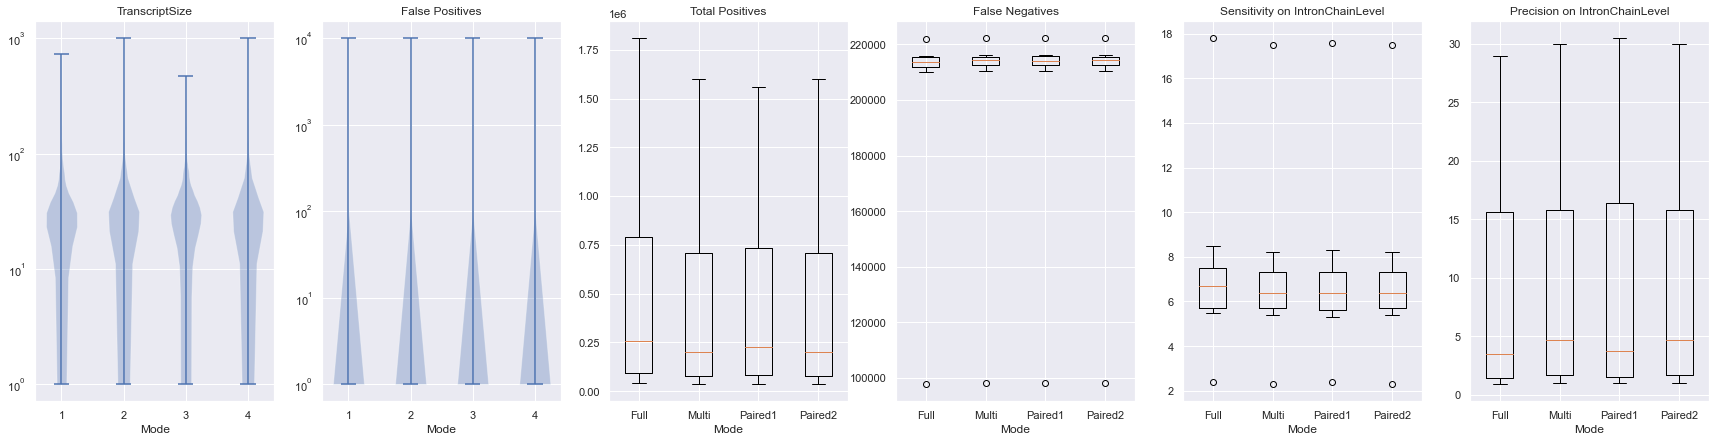

In [14]:
fig1, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6, figsize = (30, 7))
sns.set(style="darkgrid")

# Plot True Positives 
ax1.violinplot(dataset=[transcriptSizeListFull, transcriptSizeListMulti, transcriptSizeListPaired1, transcriptSizeListPaired2])
ax1.set_title('Transcript Size')
ax1.set_xlabel('Mode')
ax1.set_yscale("log")

# Plot False Positives
ax2.violinplot(dataset=[transcriptNumberListFull, transcriptNumberListMulti, transcriptNumberListPaired1, transcriptNumberListPaired2])
ax2.set_title('Numer of Transcripts Gene')
ax2.set_xlabel('Mode')
ax2.set_yscale("log")

# Plot Total Positives
ax3.barplot(x=[zeroTranscriptCounterFull, zeroTranscriptCounterMulti, zeroTranscriptCounterPaired, zeroTranscriptCounterPaired2], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax3.set_title('Number of zero Transcripts')
ax3.set_xlabel('Mode')

# Plot False Negatives
ax4.boxplot(x=[WP1_df_full['False negatives'], WP1_df_multi['False negatives'], WP1_df_paired1['False negatives'], WP1_df_paired2['False negatives']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax4.set_title('False Negatives')
ax4.set_xlabel('Mode')

# Plot Sensitivities
ax5.boxplot(x=[WP1_df_full['Sensitivity on IntronChainLevel'], WP1_df_multi['Sensitivity on IntronChainLevel'], WP1_df_paired1['Sensitivity on IntronChainLevel'], WP1_df_paired2['Sensitivity on IntronChainLevel']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax5.set_title('Sensitivity on IntronChainLevel')
ax5.set_xlabel('Mode')

# Plot Precision
ax6.boxplot(x=[WP1_df_full['Precision on IntronChainLevel'], WP1_df_multi['Precision on IntronChainLevel'], WP1_df_paired1['Precision on IntronChainLevel'], WP1_df_paired2['Precision on IntronChainLevel']], labels=['Full', 'Multi', 'Paired1', 'Paired2'])
ax6.set_title('Precision on IntronChainLevel')
ax6.set_xlabel('Mode')

plt.show()